# Project 12: Simulating Randomness

In [1]:
import random
import numpy as np
import pandas as pd

def run_monte_carlo(mean, sigma, num_sims, index):
    sim_dict = {}
    for i in range(num_sims):
        sim_dict[i] = {}
        for ix in index:
            sim_dict[i][ix] = random.normalvariate(mean, sigma)

    return sim_dict

mean = 0
sigma = 1
# number of simulations
num_sims = 2000
# number of periods per simulations
index = np.arange(2000)
monte_carlo_sim_dict = run_monte_carlo(mean, sigma, num_sims, index)
monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict)
monte_carlo_sim_df

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,-0.184480,-1.957903,0.551815,-0.088792,1.244760,0.015579,-0.234416,0.516790,0.392675,0.005293,...,1.172997,-1.751293,0.347672,-1.057379,2.683798,1.298581,0.925116,-0.047471,0.874770,0.433358
1,0.834826,-0.781874,0.247670,-1.275889,0.927864,-1.428346,-0.490502,-1.462080,0.457211,-0.707025,...,1.677273,-0.343455,0.387944,1.100985,1.370176,-0.924272,0.898934,0.011032,1.042204,1.405114
2,0.539211,0.254478,-1.712289,1.150564,-1.038048,1.711786,-0.404264,-0.165458,-0.247390,1.278928,...,-0.955190,-1.080101,0.784552,-0.580508,1.297610,0.358667,-0.559470,-1.674262,-0.048462,-0.480735
3,0.548836,0.397542,-1.305442,-1.342976,-0.022517,0.451475,0.205131,2.059967,2.137121,-2.874293,...,-0.333377,-0.522890,1.152334,0.648825,0.200731,1.753930,1.648599,-0.372181,0.181709,1.693876
4,-0.119460,-0.402043,-0.387640,0.050838,0.476673,1.555920,1.735903,-0.821375,2.475614,-0.734421,...,0.819355,-1.000087,-1.812662,0.900848,0.202651,0.613458,0.399551,-0.932595,2.478757,1.758395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.857760,-0.740203,1.093103,1.010644,1.399443,-0.718345,0.105479,0.242510,1.540988,1.544623,...,1.969145,-0.005631,1.990044,0.488462,-0.391078,0.698990,1.380468,0.211887,-2.530155,-1.057214
1996,-0.463767,1.292466,-0.800313,-0.639433,-0.687645,-0.422641,0.327322,-1.019698,0.350617,0.067740,...,0.282935,0.097729,0.591700,0.069858,0.427602,-0.377155,0.381971,0.226665,-0.769817,-1.008129
1997,-0.887369,-0.836734,-0.605932,0.126899,0.089576,2.065611,-0.562004,0.435439,1.529855,-0.305027,...,-2.209239,1.002731,-1.638679,-0.260947,1.351598,-0.295421,0.192511,0.700493,-1.496555,-1.978148
1998,1.275479,0.066872,0.000116,0.595404,-0.606430,1.640719,1.104475,1.723956,-0.382612,-0.440236,...,0.882111,-1.344971,-1.275063,-0.938355,-0.510100,-1.155356,-1.154920,-0.098043,-0.078971,-0.129237


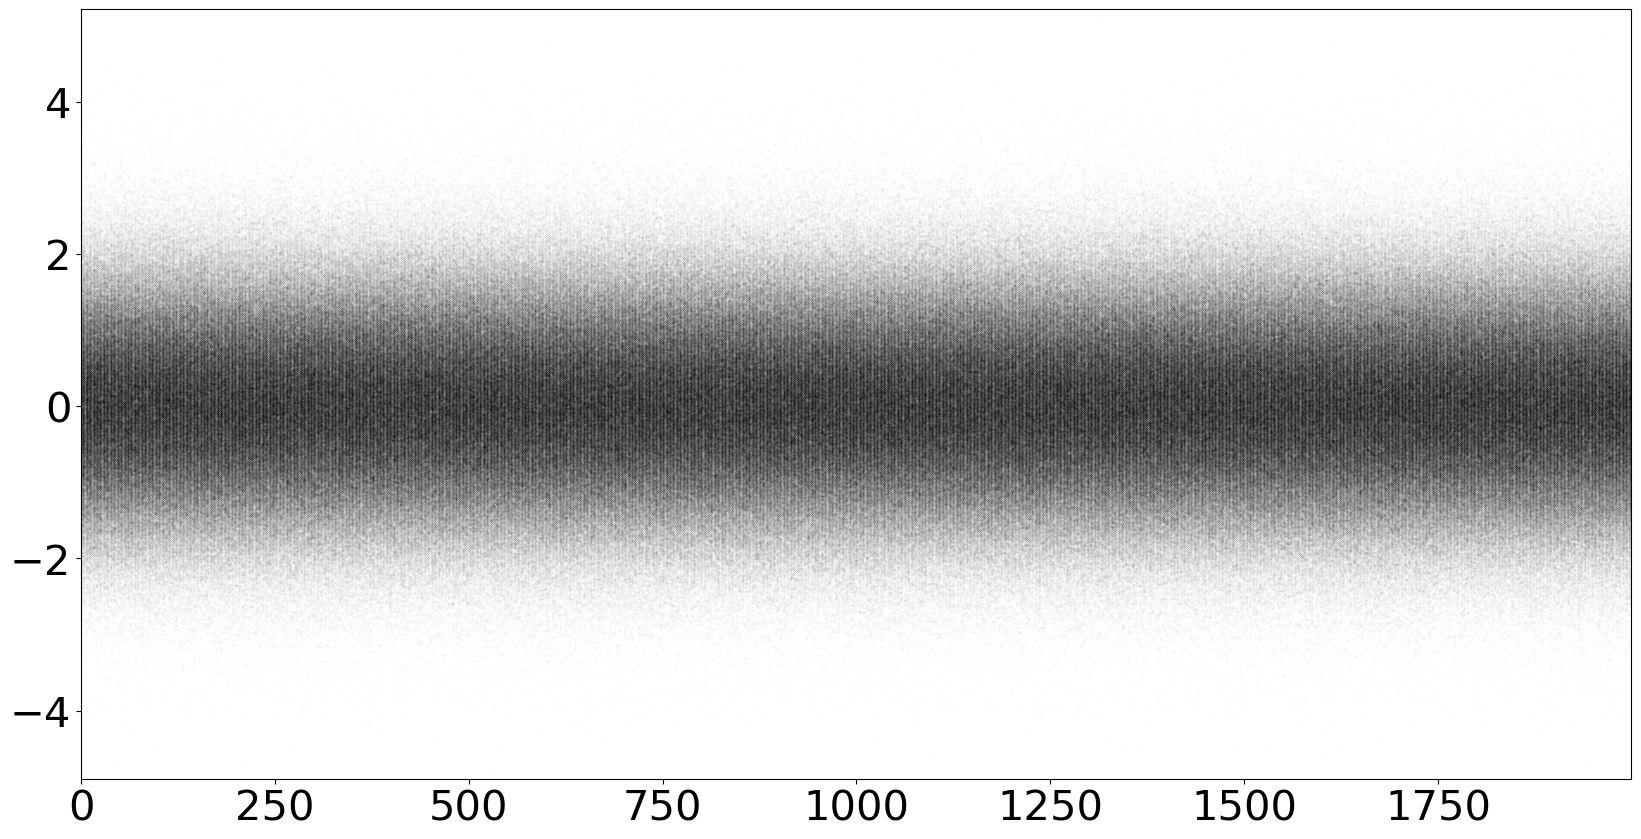

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
plt.rcParams["font.size"] = 30
fig, ax = plt.subplots(figsize = (20,10))
monte_carlo_sim_df.plot.line(legend = False, ls = "", marker = ".", markersize = .05, color = "k", alpha = .5, ax = ax)
plt.show()

<Axes: >

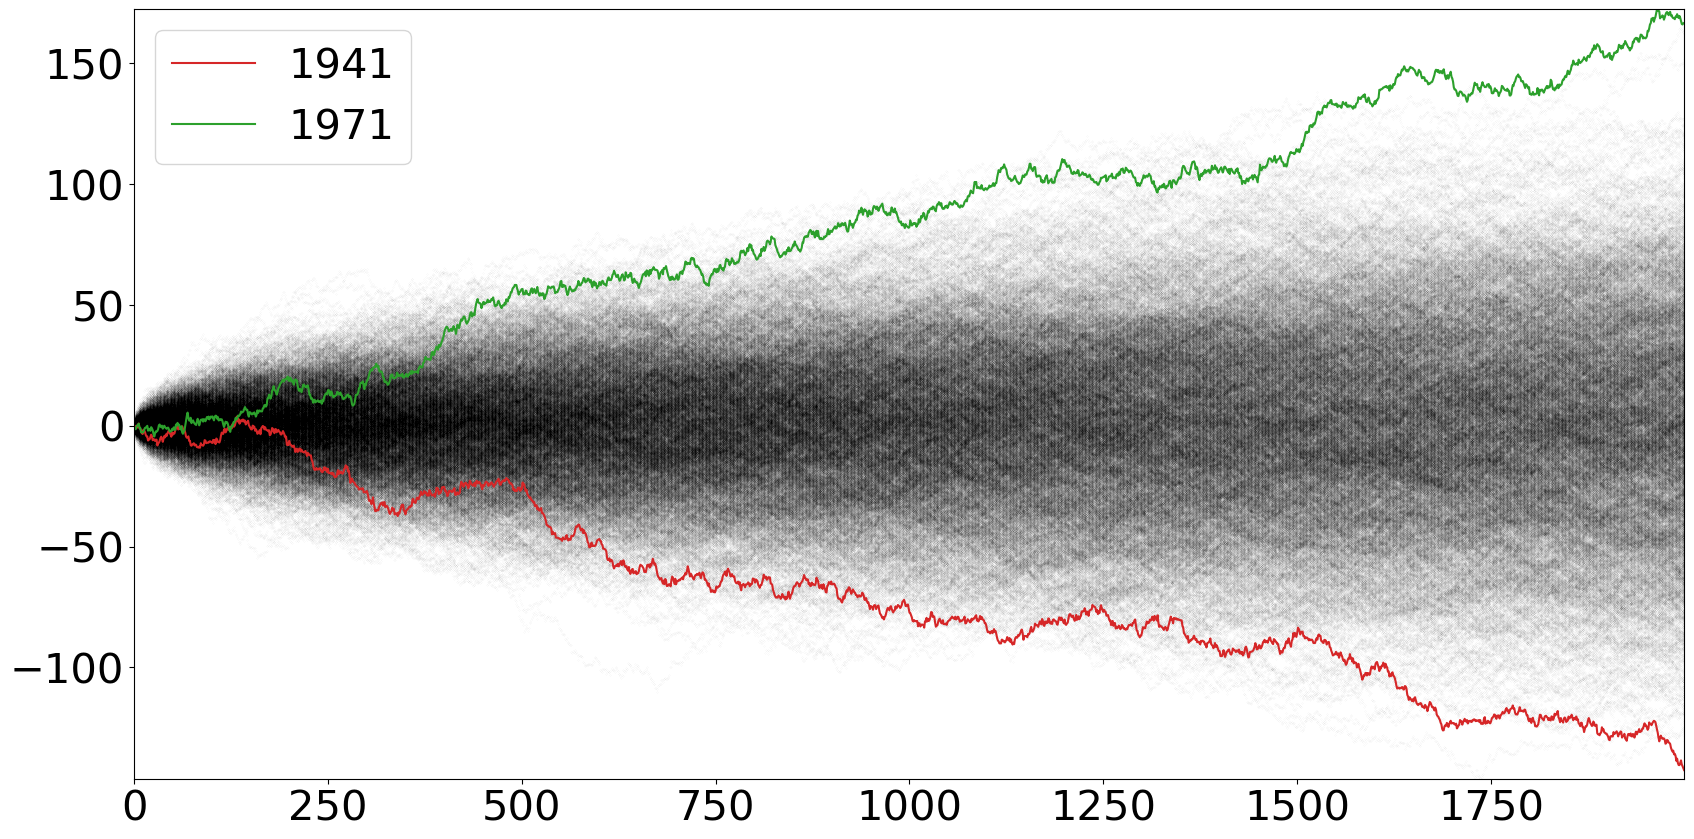

In [6]:
# find the min and max values in the very last period
plot_df = monte_carlo_sim_df.cumsum()
max = plot_df.iloc[-1].max()
min = plot_df.iloc[-1].min()
# find the column with the min and max values
## index of last row refers to the key since key values start at 0
min_key = plot_df.iloc[-1][plot_df.iloc[-1] == min].index
max_key = plot_df.iloc[-1][plot_df.iloc[-1] == max].index

fig, ax = plt.subplots(figsize = (20,10))
plot_df.plot.line(legend = False, ls = "", marker = ".", markersize = .05, color = "k", alpha = .5, ax = ax)
plot_df[min_key].plot.line(legend = False, color = "C3", ax = ax)
plot_df[max_key].plot.line(legend = False, color = "C2", ax = ax)

In [7]:
mean = .05
sigma = .5
monte_carlo_sim_dict = run_monte_carlo(mean, sigma, num_sims, index)
monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict).cumsum()
monte_carlo_sim_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
1995,110.569957,66.431036,84.721001,116.576014,107.210166,94.252339,89.493325,104.372060,102.514147,89.560704,...,94.585748,64.155132,101.467345,106.761645,75.996581,126.202228,82.279157,82.945257,118.728017,72.642778
1996,111.778270,66.306188,84.485489,116.366727,107.520508,93.416963,89.342145,103.671966,102.501257,89.832823,...,94.987090,64.835997,101.757258,106.074525,76.213514,126.059007,81.962626,83.050363,118.112844,73.036947
1997,111.772722,65.979876,85.034309,116.314546,108.117853,92.291775,88.570724,104.654531,102.612312,90.206989,...,95.244685,64.408572,102.073564,106.342956,77.008595,127.096160,81.486687,82.903428,119.301279,73.441271
1998,112.608761,65.811274,84.846285,116.839176,108.535575,92.888274,89.851184,103.779799,102.676093,90.697997,...,95.285865,63.982866,101.874169,106.270028,76.912833,127.310461,82.078568,82.541373,119.576536,73.421577
1999,113.111242,65.530438,84.185236,116.416355,108.841236,93.357048,89.530249,103.734772,102.151986,90.368232,...,95.090117,63.445799,102.215665,106.405526,76.554923,126.092953,82.612700,82.911508,119.411241,72.865779


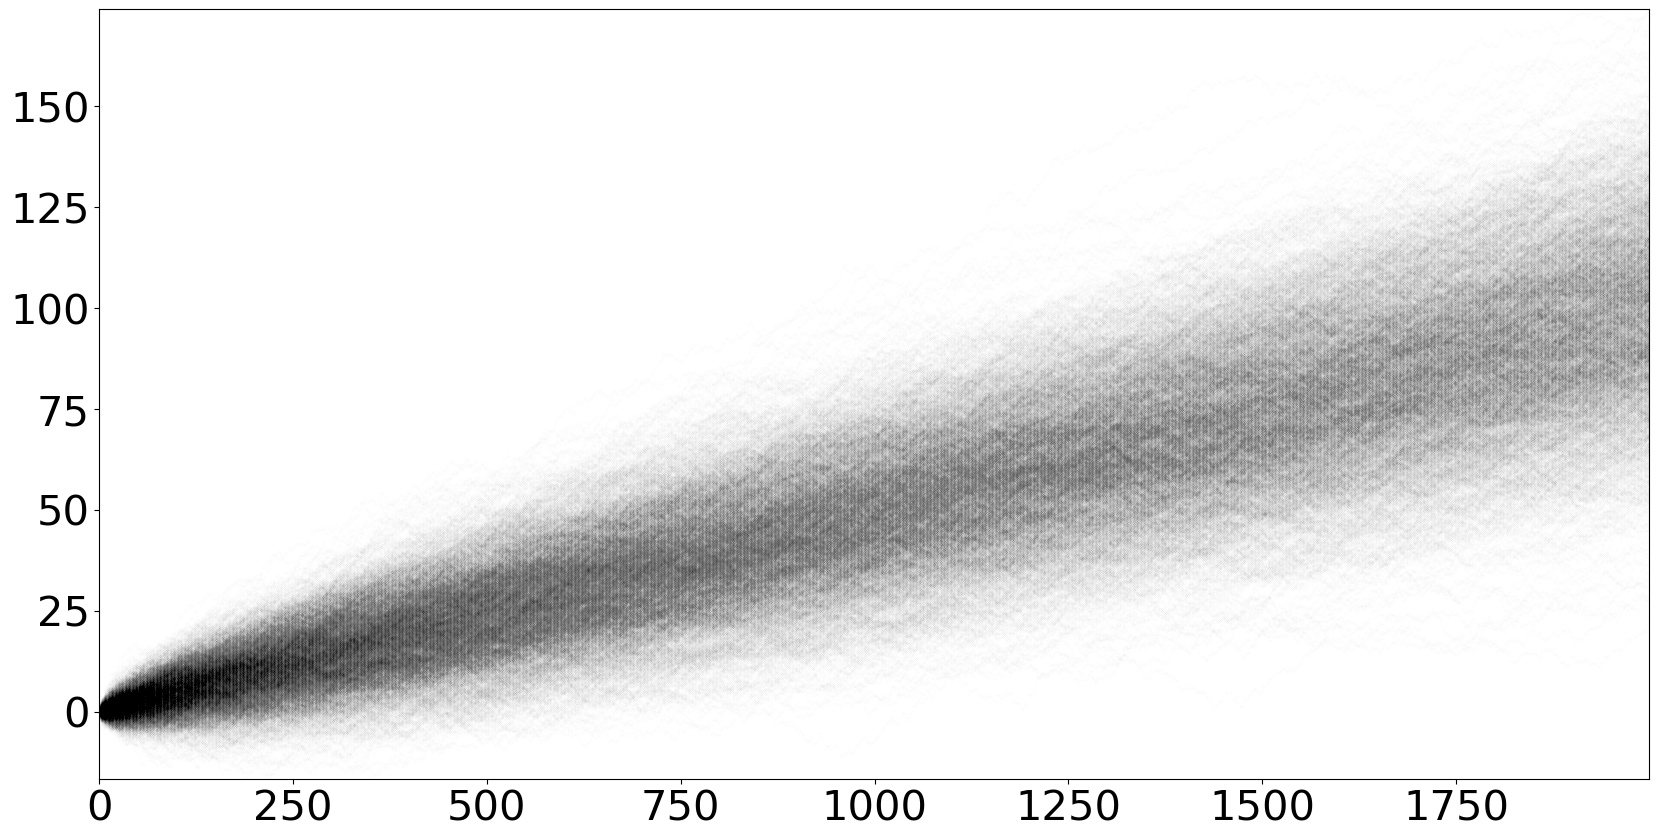

In [9]:
def plot_monte_carlo_sim(sim_data, title = None, logy = True):
    # calculate mean value by period
    sim_data["mean"] = sim_data.mean(axis=1)
    fig, ax = plt.subplots(figsize = (20,10))
    sim_data.drop("mean", inplace = False, axis = 1).plot.line(
        legend = False, ls = "", marker = ".", markersize = .2, color = "k",
        alpha = .05, logy = logy, ax = ax)
    sim_data["mean"].plot.line(color = "C3"

plot_monte_carlo_sim(monte_carlo_sim_df,
                     title = "Monte Carlo\nCumulative with Postiive Trend", logy = False)